<a href="https://colab.research.google.com/github/raultyv/Machine_learning/blob/main/AdaBoost_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
###############################################################################
#### Proyecto 1: Machine learning  ############################################
#### Paper: Comparison of machine learning algorithm for Santander dataset  ###
###############################################################################
#### Integrantes  #############################################################
#### -
#### -
#### -
#### -
###############################################################################

## Paso 1: Importar los dateset enviados por el profesor
import pandas as pd
import numpy as np

# 1.1 Definir las rutas (al estar en la raíz de la carpeta 'Files', la ruta es directa)
train_path = '/content/train.csv'
test_path = '/content/test.csv'

# 1.2 Cargar los datos
# El paper menciona que trabajamos con 200,000 registros por archivo
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.head()
test_df.head()

print(f"¡Carga completada desde el almacenamiento local!")
print(f"Registros cargados: {len(train_df)}")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Paso 2: Pre - procesamiento de la información
# 2.1 Separación de variables predictoras (X) y objetivo (y)
# Basado en la estructura vista en head(), eliminamos ID y Target
X = train_df.drop(['ID_code', 'target'], axis=1)
y = train_df['target']

# 2.2 Normalización de Rango 0-1 (Exigencia del Paper y segun lo aprendido en clase)
scaler = MinMaxScaler(feature_range=(0, 1)) #escalador de datos
X_scaled = scaler.fit_transform(X) #Calcula los mínimos/máximos (fit) y escala los datos al rango 0-1 (transform) en un solo paso.

# Convertimos a DataFrame para mantener consistencia con las funciones de clase
X_final = pd.DataFrame(X_scaled, columns=X.columns)

# 2.3 División de datos para Validación (Rúbrica)
# Usamos un 20% para test y estratificamos para manejar el desbalance
X_train, X_val, y_train, y_val = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Datos listos para la Regresión Logística.")
print(f"Tamaño de entrenamiento: {X_train.shape}")
print(f"Tamaño de validación: {X_val.shape}")
print(f"Nuevo valor mínimo de var_0: {X_final['var_0'].min()}")
print(f"Nuevo valor máximo de var_0: {X_final['var_0'].max()}")

¡Carga completada desde el almacenamiento local!
Registros cargados: 200000
Datos listos para la Regresión Logística.
Tamaño de entrenamiento: (160000, 200)
Tamaño de validación: (40000, 200)
Nuevo valor mínimo de var_0: 0.0
Nuevo valor máximo de var_0: 0.9999999999999999


Iniciando entrenamiento de AdaBoost Estándar (Decision Stumps)...

--- REPORTE DE CLASIFICACIÓN: ADABOOST (ÁRBOLES) ---
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35980
           1       0.00      0.00      0.00      4020

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000

AUC-ROC Final: 0.7176


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


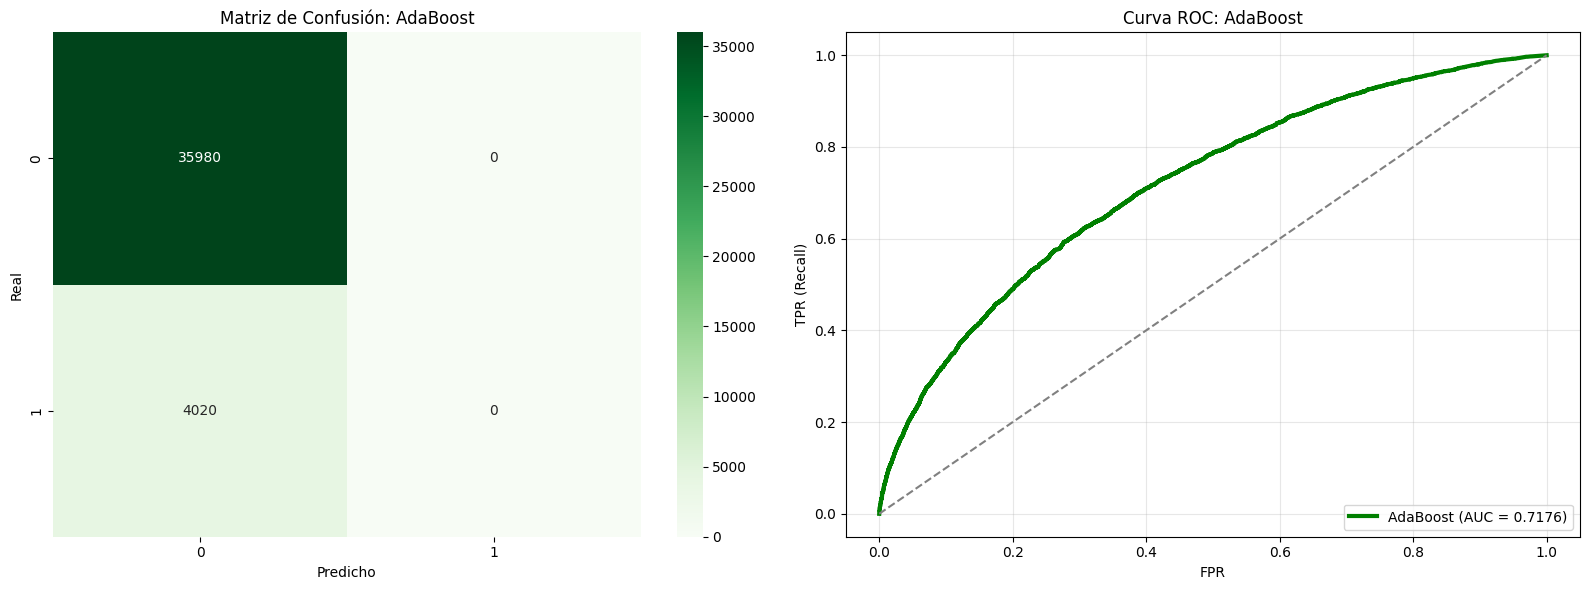

In [4]:
###############################################################################
#### Proyecto 1: Machine learning  ############################################
#### Modelo:_ AdaBoost : Base regresión Logistica (L2, C=0.01)  ###############
###############################################################################
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 5.1 Configuración del Modelo
# Usamos el estimador por defecto (DecisionTreeClassifier de profundidad 1)
# n_estimators: 300 iteraciones para buscar superar a la Regresión Logística
# learning_rate: 0.05 para un aprendizaje estable y evitar el sobreajuste al ruido
model_ada = AdaBoostClassifier(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)

print("Iniciando entrenamiento de AdaBoost Estándar (Decision Stumps)...")
model_ada.fit(X_train, y_train)

# 5.2 Predicciones
y_pred_ada = model_ada.predict(X_val)
y_proba_ada = model_ada.predict_proba(X_val)[:, 1]

# 5.3 Evaluación
print("\n--- REPORTE DE CLASIFICACIÓN: ADABOOST (ÁRBOLES) ---")
print(classification_report(y_val, y_pred_ada))
auc_ada = roc_auc_score(y_val, y_proba_ada)
print(f"AUC-ROC Final: {auc_ada:.4f}")

# 5.4 Visualización (Matriz de Confusión y ROC)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# A. Matriz de Confusión
sns.heatmap(confusion_matrix(y_val, y_pred_ada), annot=True, fmt='d', cmap='Greens', ax=ax[0])
ax[0].set_title('Matriz de Confusión: AdaBoost')
ax[0].set_xlabel('Predicho')
ax[0].set_ylabel('Real')

# B. Curva ROC
fpr_ada, tpr_ada, _ = roc_curve(y_val, y_proba_ada)
ax[1].plot(fpr_ada, tpr_ada, color='green', lw=3, label=f'AdaBoost (AUC = {auc_ada:.4f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_title('Curva ROC: AdaBoost')
ax[1].set_xlabel('FPR')
ax[1].set_ylabel('TPR (Recall)')
ax[1].legend(loc="lower right")
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()




